# Разбиение выборки

Разбиение выборки — это разделение имеющихся данных на несколько частей для проведения процессов обучения и валидации алгоритма МО так, чтобы оба процесса выполнялись на полностью независимых наборах данных.

### Какие бывают выборки:

- **Обучающая** — подмножество данных, на котором мы обучаем модель.
- **Валидационная** — подмножество данных, на котором мы валидируем модель, то есть проверяем промежуточные результаты. Выборка нужна для проверки модели.
- **Тестовая** — подмножество данных, на котором мы тестируем модель после проверки всевозможных гипотез.


Обучаем на обучающей выборке: модель явно затачивается под обучающую выборку. Валидируем на валидационной и подкручиваем параметры модели: модель неявно затачивается под валидационную выборку. Тестовая выборка имитирует тестирование модели в реальных условиях.

Давайте еще раз повторим, почему нам необходимо разбивать выборку, и почему обучение на всей выборке не является хорошей идеей. 

> ### Почему не стоит обучать на всей выборке?
Основная цель для нас — это получить модель с хорошей прогностической способностью. Нам не столько важен результат предсказания на нашей выборке (так как на ней нам уже известны все значения признаков), сколько важно уметь предсказывать значения целевой переменной для объектов, которые мы будем исследовать в будущем.

Поэтому нам важно проверить, насколько хорошо наша модель сможет сделать предсказание на новой для нее выборке. Вследствие этого мы обучаем ее на одной части выборки, а тестируем ее прогностическую способность на второй, тестовой, которая является для алгоритма новой.

Теперь давайте рассмотрим, какие способы разбиения выборки существуют.

## Как разбить выборку
- ### сomplete CV — полный скользящий контроль
    
    В данном случае оценка строится по всем возможным разбиениям. Важно упомянуть этот метод, однако стоит понимать, что даже при малых размерах длины обучающей выборки число выборки очень большое, и это затрудняет практическое применение данного метода. Полный скользящий контроль используют в теоретических исследованиях или в тех случаях (довольно редких), когда удается вывести вычислительную формулу, позволяющую реализовать вычисления.
    К примеру, для метода `k` ближайших соседней такая формула известна, об этом можно почитать [тут](https://cms-stage-skillfactory.raccoongang.com/assets/courseware/v1/9e236a458bb74ef3af6c48e67f727812/asset-v1:Skillfactory+MLO-TEST+MAR2020+type@asset+block/icml2000-rahuls.pdf). Но все же этот метод разбиения используется на практике крайне редко.


- ### hold-out — отложенная выборка
    Разбиваем выборку на обучающую, валидационную и, по желанию, на тестовую выборки. Обычно в соотношении 60/40 или 70/30, вместе с тестовой — 60/20/20 или 70/15/15.

    Данный метод чаще всего применяется в случае больших датасетов в силу того, что требует значительно меньше вычислительных мощностей, чем другие методы.

    Однако важно помнить, что оценка в этом методе сильно зависит от разбиения. Это плохо, так как оценка должна в первую очередь характеризовать сам алгоритм обучения, а не способ разбиения.

In [1]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
iris_source = load_iris()

In [3]:
iris_data_path = iris_source['filename']

iris_data = pd.read_csv(iris_data_path,
                        names=['sepal_length', 'sepal_width',
                               'petal_length', 'petal_width', 'class'], header=0)

In [4]:
iris_data.sample(5)

,sepal_length,sepal_width,petal_length,petal_width,class
49,5.0,3.3,1.4,0.2,0
59,5.2,2.7,3.9,1.4,1
19,5.1,3.8,1.5,0.3,0
140,6.7,3.1,5.6,2.4,2
36,5.5,3.5,1.3,0.2,0


In [5]:
from sklearn.model_selection import train_test_split

train, valid = train_test_split(iris_data, test_size=0.15, shuffle=True)

print('Размер исходной выборки: {}\nРазмер тренировочной выборки: {}\nРазмер валидационной выборки: {}'
      .format(iris_data.shape, train.shape, valid.shape)
      )

Размер исходной выборки: (150, 5)
Размер тренировочной выборки: (127, 5)
Размер валидационной выборки: (23, 5)


In [6]:
def visualize_train_valid_counts(init_data, train, valid):
    x = np.array([0, 1, 2])
    width = 0.2

    plt.figure(figsize=(15, 8))
    ax = plt.subplot(111)

    classes = list(init_data['class'].value_counts().index)

    ax.bar(x - width, list(init_data['class'].value_counts()
                           [classes]), width, color='r', label='Исходные данные')
    ax.bar(x, list(train['class'].value_counts()[classes]),
           width, color='g', label='Тренировочная выборка')
    ax.bar(x, list(valid['class'].value_counts()[classes]), width, bottom=list(
        train['class'].value_counts()[classes]), color='b', label='Валидационная выборка')

    ax.set_ylim([0, 70])
    plt.xticks(x - width / 2, classes, fontsize=20)
    plt.yticks(fontsize=15)
    plt.ylabel('Кол-во примеров', fontsize=20)
    plt.minorticks_on()
    plt.grid(which='major', color='r')
    plt.grid(which='minor', linestyle=':', color='k')
    plt.legend(fontsize=15)

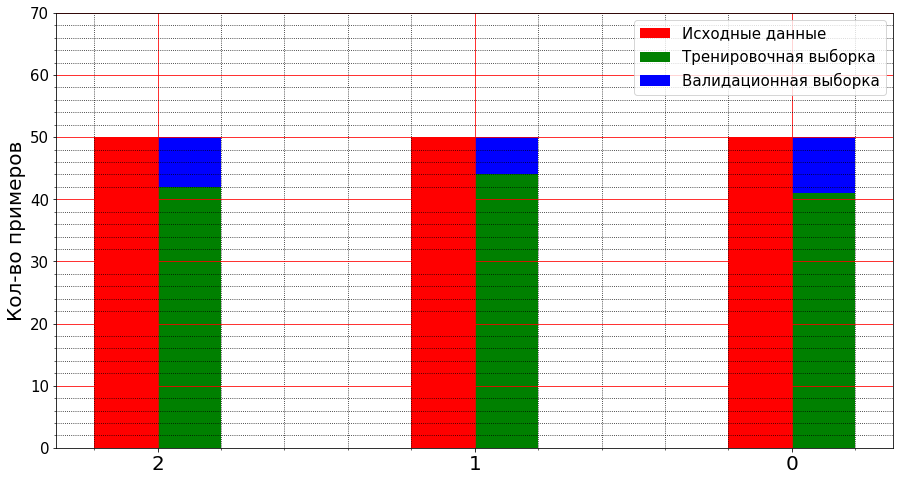

In [7]:
visualize_train_valid_counts(iris_data, train, valid)

У нас три класса цветков, в каждом из которых получилось разное количество примеров с выборками, в третьем примере значительно больше примеров на валидационной выборке. Получилось **неравномерное распределение классов** после разбиения, так как мы не учли доли классов.

Проблема решается с помощью **stratified разбиения** или стратифицированного разбиения. В библиотеке sklearn есть нужный нам класс **StratifiedShuffleSplit**:

In [8]:
from sklearn.model_selection import StratifiedShuffleSplit

sss = StratifiedShuffleSplit(n_splits=1, test_size=0.15)
train_indices, valid_indices = [split for split in sss.split(
    iris_data.iloc[:, :4], iris_data.iloc[:, 4])][0]
s_train = iris_data.iloc[train_indices]
s_valid = iris_data.iloc[valid_indices]

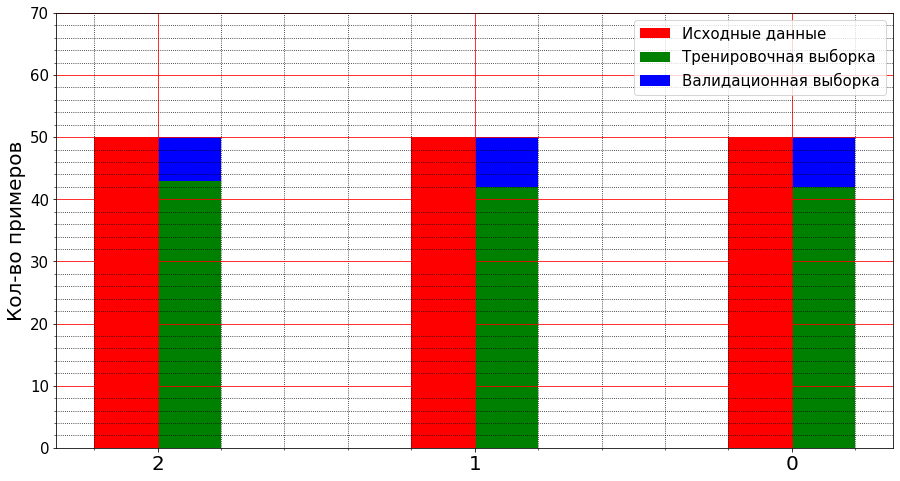

In [9]:
visualize_train_valid_counts(iris_data, s_train, s_valid)

В класс мы передали количество разбиений, размер выборки и вызвали метод split() для более равномерного распределения. В результате разбиение получилось практически одинаковым.

Как разбить выборку на три части? Определить размер выборок и поделить дважды: сначала на тренировочную и остальное, затем остальное на валидационную и тестовую:

In [10]:
valid_frac = 0.15
test_frac = 0.15

valid_count = int(valid_frac * iris_data.shape[0])
test_count = int(test_frac * iris_data.shape[0])

train, valid_test = train_test_split(iris_data,
                                     test_size=(valid_count + test_count))

valid, test = train_test_split(valid_test, test_size=test_count)

- ### k-fold — cross-validation, перекрёстная валидация
    - Разбиваем выборку на `k` частей.
    - Повторяем `k` раз: обучаем на `k-1` частях, валидируем на оставшейся части.
    - Усредняем значения метрики.
    
    Позволяет сделать оценку качества более `робастной` — устойчивой к помехам.
    Чаще всего `k` имеет значение 10 (или 5 в случае маленьких выборок

In [11]:
from sklearn.model_selection import KFold

# shuffle=False исключает предварительное перемешивание примеров
kf = KFold(n_splits=3, shuffle=False)

for train_index, valid_index in kf.split(iris_data):
    print('train indices: {}\nvalid indices: {}'.format(train_index, valid_index))
    print('='*20)

train indices: [ 50  51  52  53  54  55  56  57  58  59  60  61  62  63  64  65  66  67
  68  69  70  71  72  73  74  75  76  77  78  79  80  81  82  83  84  85
  86  87  88  89  90  91  92  93  94  95  96  97  98  99 100 101 102 103
 104 105 106 107 108 109 110 111 112 113 114 115 116 117 118 119 120 121
 122 123 124 125 126 127 128 129 130 131 132 133 134 135 136 137 138 139
 140 141 142 143 144 145 146 147 148 149]
valid indices: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49]
train indices: [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49 100 101 102 103
 104 105 106 107 108 109 110 111 112 113 114 115 116 117 118 119 120 121
 122 123 124 125 126 127 128 129 130 131 132 133 134 135 136 137 138 139
 140 141 142 143 144 145 146 

- ### t×k-fold кросс-валидация

    Процедура выполняется `t` раз. Обучающая выборка случайным образом разбивается на `k` непересекающихся, одинаковых по объему частей. Производится k итераций. На каждой итерации происходит `k-fold`-разбиение.

    По сути, такой тип валидации — это `k-fold` валидация, которая повторяется t раз. Такой способ контроля обладает всеми преимуществами `k-fold`-валидации, но при этом добавляется возможность увеличивать число разбиений.


- ### leave-one-out — отложенный пример
    Предельный случай `k-fold`, при котором `k` равняется размеру всей выборки:

    - Выбираем пример для валидации, обучаем на всех остальных.
    - Выбираем пример для валидации, который ещё не видели, возвращаемся в пункт 1.
    
    Частный случай leave-P-out, при котором нужно перебрать все способы выбора P-элементов из выборки.  Большим недостатком данного метода является то, что он очень ресурсозатратен. Однако нельзя утверждать, что он вообще не используется. В некоторых методах обучения вычисление LOO получается заметно ускорить, и его использование становится возможным.

In [12]:
from sklearn.model_selection import LeaveOneOut

loo = LeaveOneOut()

for train_index, valid_index in loo.split(iris_data[:5]):
    print('train indices: {}\nvalid indices: {}'.format(train_index, valid_index))
    print('='*20)

train indices: [1 2 3 4]
valid indices: [0]
train indices: [0 2 3 4]
valid indices: [1]
train indices: [0 1 3 4]
valid indices: [2]
train indices: [0 1 2 4]
valid indices: [3]
train indices: [0 1 2 3]
valid indices: [4]


## Проблемы при разбиении
- Обучение на **тестовой выборке**.
- В тренировочной и тестовой выборках оказываются **данные разной природы**.
Пример: при классификации автомобилей в тренировочную выборку попали примеры с одними типами двигателей, а в тестовую — с другими.
- В тренировочной и тестовой выборках оказываются примеры **со схожими признаками**.
Пример: при обучении модели предсказывают пол, разные фотографии одного и того же человека попадают в разные выборки.

### Задание

> Загрузите данные train.csv, разделите выборку на обучающую и тестовую части в соотношении 70% на 30% без перемешивания. Найдите среднее значение для признака `payment_amount`. Обратите внимание, что среднее нужно считать по тестовой выборке.

In [13]:
vis_data = pd.read_csv("./data/train.csv", encoding = 'ISO-8859-1', low_memory = False)
vis_data.sample(3)

,ticket_id,agency_name,inspector_name,violator_name,violation_street_number,violation_street_name,violation_zip_code,mailing_address_str_number,mailing_address_str_name,city,...,clean_up_cost,judgment_amount,payment_amount,balance_due,payment_date,payment_status,collection_status,grafitti_status,compliance_detail,compliance
172171,203119,Department of Public Works,"Johnson, Lois","WATKINS, FRANCES",5961.0,BLUEHILL,NaN,77.0,COAST RD. #233,SELMA,...,0.0,3880.0,0.0,3880.0,NaN,NO PAYMENT APPLIED,NaN,NaN,non-compliant by no payment,0.0
22903,45385,"Buildings, Safety Engineering & Env Department","Thomas, Don","SANDERS, PATRICIA",8266.0,MARION,NaN,711.0,PALMETTO,DETROIT,...,0.0,0.0,0.0,0.0,NaN,NO PAYMENT APPLIED,NaN,NaN,not responsible by disposition,NaN
206279,239179,"Buildings, Safety Engineering & Env Department","ELLARD, EVERETT","PROPERTIES, BRIGHSIDE",12160.0,CLOVERDALE,NaN,713.0,TIMBERVIEW TRAIL,WEST BLOOMFIELD,...,0.0,305.0,0.0,305.0,NaN,NO PAYMENT APPLIED,NaN,NaN,non-compliant by no payment,0.0


In [14]:
train, valid = train_test_split(vis_data, test_size=0.3, shuffle=False)

In [15]:
valid['payment_amount'].mean()

34.138390241304

In [17]:
from sklearn.metrics import mean_squared_error

In [20]:
np.round(np.sqrt(mean_squared_error([1.23, 2.35, 2.75], [1.01, 12.3, 2.74])), 2)

5.75